In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

# Census API Key
from config import api_key
c = Census(api_key, year=2016)
#c.acs5.tables()

In [2]:
inner_zips=['77002','77003','77004','77005','77006','77007','77008','77009',
            '77010','77011','77012','77019','77020','77021','77023','77025',
            '77026','77027','77030']

In [ ]:
#Hispanic: B03002_012E
#Black: B02001_003E OR B03002_004E
#AmerIn: B02001_004E OR B03002_005E
#Asian: B02001_005E OR B03002_006E
#White: B02001_002E OR B03002_003E
#Other: B02001_007E OR B03002_008E

In [25]:


dictionary = {'NAME' : [],
              "Year" : [],
             "B19013_001E" : [],
             "B01003_001E" : [],
             "B01002_001E" : [],
             "B19301_001E" : [],
             "B17001_002E" : [],
              "B03002_012E" : [], 
              "B03002_004E" : [], 
              "B03002_005E" : [], 
              "B03002_006E" : [], 
              "B03002_003E" : [], 
              "B03002_008E" : [], 
             "zip code tabulation area" : []}

hou_zips = inner_zips

years = list(range(2012, 2018))

for y in years:
    c = Census(api_key, year=y)
    for z in hou_zips:
        census_loop = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                              "B01002_001E", "B19301_001E",
                              "B17001_002E", "B03002_012E",
                                   "B03002_004E", "B03002_005E", 
                                 "B03002_006E", "B03002_003E", 
                                 "B03002_008E"), {'for': f'zip code tabulation area:{z}'})
#         print(census_loop)
        dictionary['NAME'].append(census_loop[0]['NAME'])
        dictionary['Year'].append(y)
        dictionary['B19013_001E'].append(census_loop[0]["B19013_001E"])
        dictionary['B01003_001E'].append(census_loop[0]["B01003_001E"])
        dictionary['B01002_001E'].append(census_loop[0]["B01002_001E"])
        dictionary['B19301_001E'].append(census_loop[0]["B19301_001E"])
        dictionary['B17001_002E'].append(census_loop[0]["B17001_002E"])
        dictionary['B03002_012E'].append(census_loop[0]["B03002_012E"])
        dictionary['B03002_004E'].append(census_loop[0]["B03002_004E"])
        dictionary['B03002_005E'].append(census_loop[0]["B03002_005E"])
        dictionary['B03002_006E'].append(census_loop[0]["B03002_006E"])
        dictionary['B03002_003E'].append(census_loop[0]["B03002_003E"])
        dictionary['B03002_008E'].append(census_loop[0]["B03002_008E"])
        dictionary['zip code tabulation area'].append(census_loop[0]["zip code tabulation area"])

# dictionary

In [26]:
census_df = pd.DataFrame(dictionary)
census_df.head()

,NAME,Year,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,B03002_012E,B03002_004E,B03002_005E,B03002_006E,B03002_003E,B03002_008E,zip code tabulation area
0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,3175.0,4002.0,6.0,232.0,4018.0,0.0,77002
1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,5351.0,2063.0,0.0,443.0,2318.0,26.0,77003
2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,3358.0,16520.0,10.0,2149.0,7198.0,120.0,77004
3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,2076.0,746.0,25.0,2484.0,19856.0,60.0,77005
4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,3816.0,695.0,38.0,1127.0,13874.0,66.0,77006


In [28]:
census_pd = census_df.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B03002_003E": "Count White", 
                                      "B03002_004E": "Counb Black/AfAm",
                                      "B03002_012E": "Count Hisp/Latino",
                                      "B03002_006E": "Count Asian",
                                      "B03002_005E": "Count AmIndian",
                                      "B03002_008E": "Count Other Race",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
census_pd.head()

,Name,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Count Hisp/Latino,Counb Black/AfAm,Count AmIndian,Count Asian,Count White,Count Other Race,Zipcode
0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,3175.0,4002.0,6.0,232.0,4018.0,0.0,77002
1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,5351.0,2063.0,0.0,443.0,2318.0,26.0,77003
2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,3358.0,16520.0,10.0,2149.0,7198.0,120.0,77004
3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,2076.0,746.0,25.0,2484.0,19856.0,60.0,77005
4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,3816.0,695.0,38.0,1127.0,13874.0,66.0,77006


In [29]:

census_pd.to_csv("census_df_isoto.csv") 

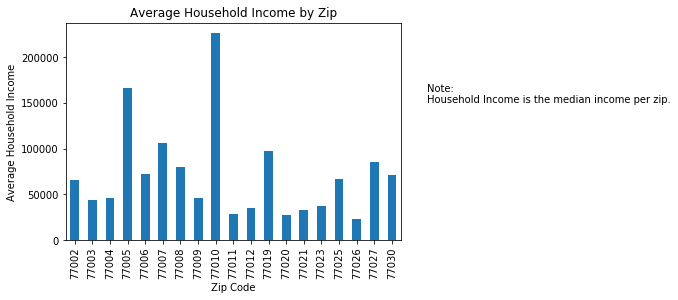

<Figure size 432x288 with 0 Axes>

In [34]:
#make a graph showing age ranges and income for each zip code
#group by zip code so that it will have the all the years of data in them
census_groups = census_pd.groupby('Zipcode')

#get the average of household income, which is the average median income by zip code
census_group_income = census_groups["Household Income"].mean()

census_chart_1 = census_group_income.plot(kind = "bar", title="Average Household Income by Zip")
census_chart_1.set_xlabel("Zip Code")
census_chart_1.set_ylabel("Average Household Income")

# Incorporate a text label regarding circle size
textstr = "Note:\nHousehold Income is the median income per zip."
plt.text(20, 150000, textstr, fontsize=10)

plt.show()
plt.tight_layout()


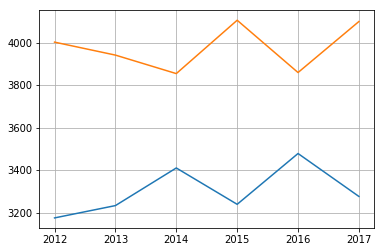